In [5]:
import sqlite3

connection = sqlite3.connect("command_usage.db")
cursor = connection.execute("SELECT * FROM COMMAND_USAGE")

data = cursor.fetchall()

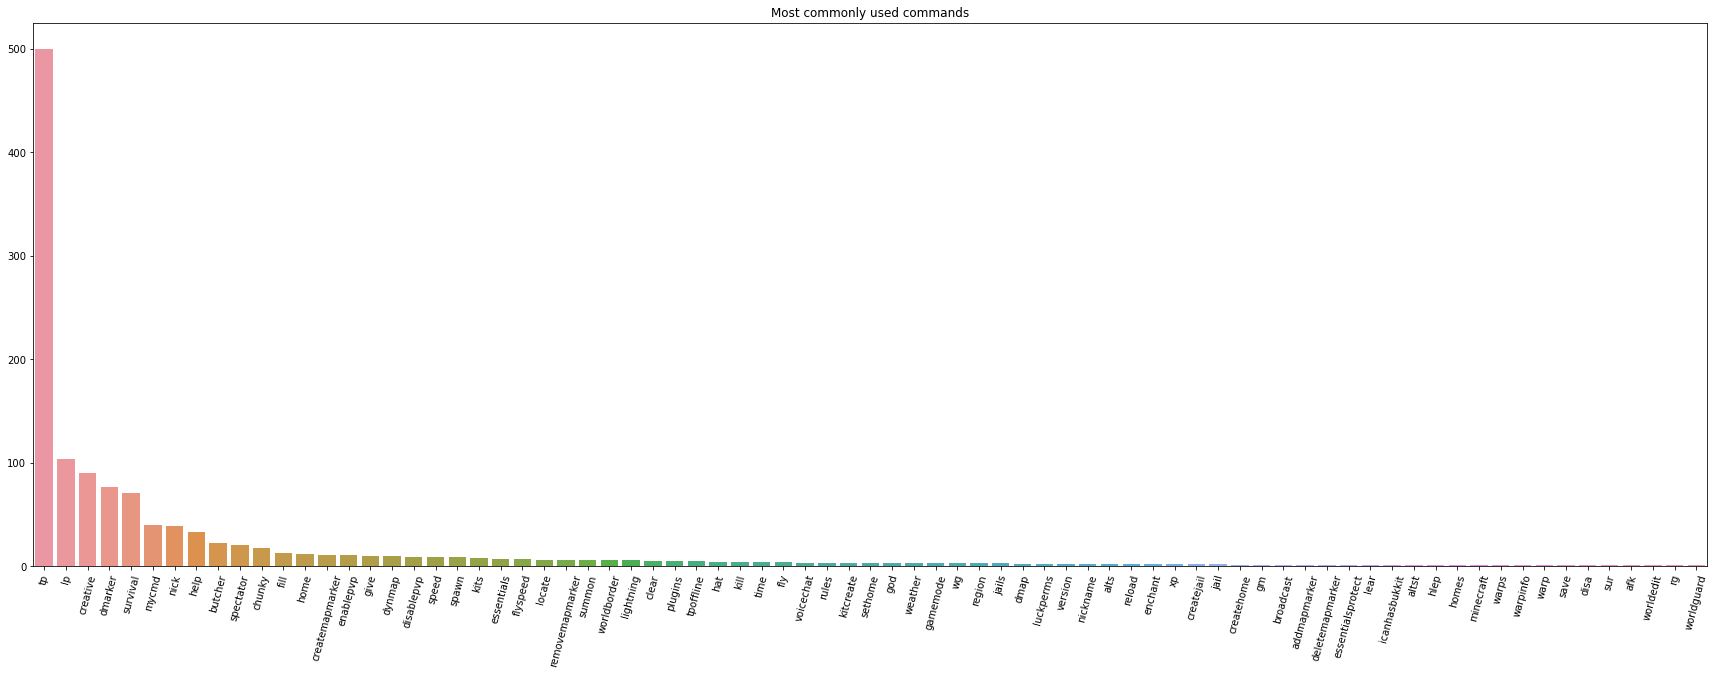

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"]=30,10

most_common_commands = {}

for entry in data:
    command = entry[2]
    if not command in most_common_commands:
        most_common_commands[command] = 0
    
    most_common_commands[command] = most_common_commands[command] + 1
    most_common_commands = dict(sorted(most_common_commands.items(), key=lambda item: item[1], reverse=True))

graph = sb.barplot(x=list(most_common_commands.keys()), y=list(most_common_commands.values()))
graph.set_title("Most commonly used commands")

plt.xticks(rotation=75)
plt.show()

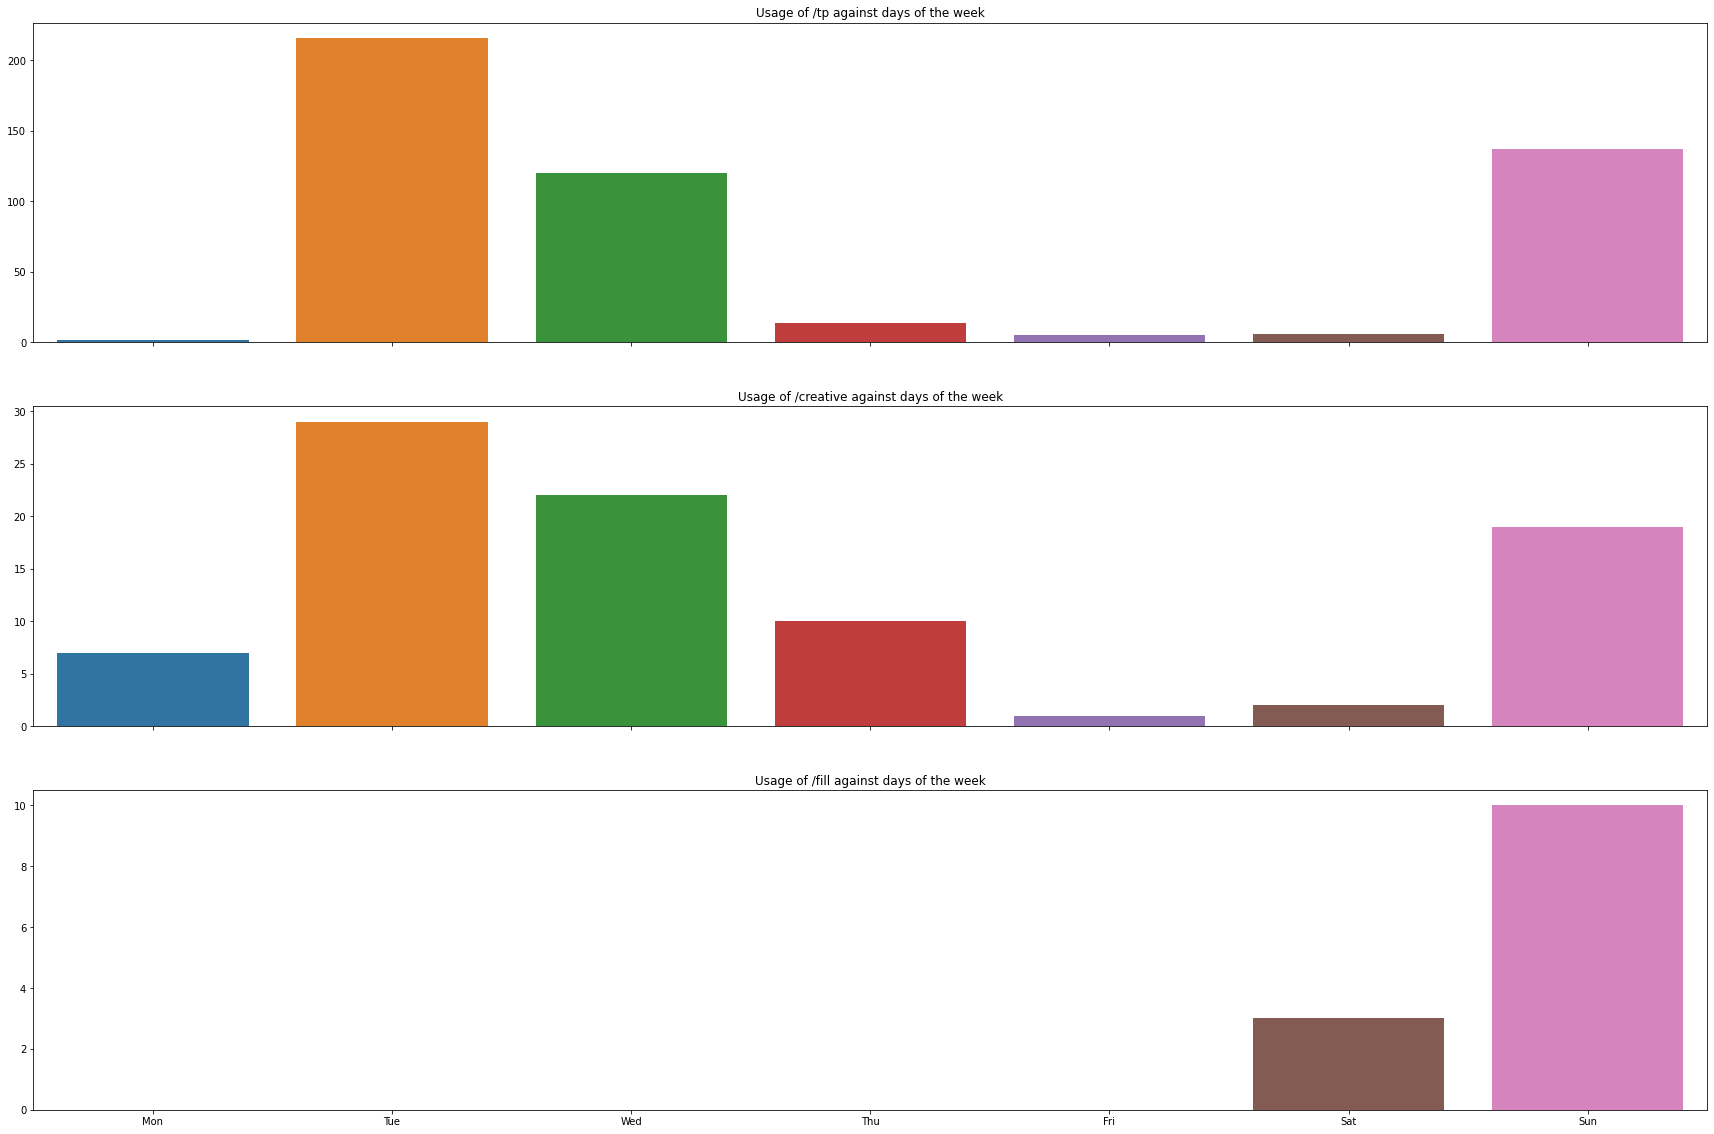

In [7]:
from datetime import datetime

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

commands = ["tp", "creative", "fill"]

plt.rcParams["figure.figsize"]=30,20
figure,axes = plt.subplots(len(commands), sharex=True)

for i,command in enumerate(commands):
    usage_per_day = {days[0]: 0, days[1]: 0, days[2]: 0, days[3]: 0, days[4]: 0, days[5]: 0, days[6]: 0}
    for entry in data:
        datetime_string = entry[0]
        if entry[2] == command:
            date = datetime(int(datetime_string[0:4]), int(datetime_string[5:7]), int(datetime_string[8:10]))
            usage_per_day[days[date.weekday()]] += 1

    graph = sb.barplot(x=list(usage_per_day.keys()), y=list(usage_per_day.values()), ax=axes[i])
    graph.set_title(f"Usage of /{command} against days of the week")

plt.show()